In [1]:
mt5_raw = {
    "rouge": {
        "rouge1": 0.026913252858516992,
        "rouge2": 0.005964871741447665,
        "rougeL": 0.02463791869288603,
        "rougeLsum": 0.024679310547480817
    },
    "bert": {
        "Precision": 0.5991005947304633,
        "Recall": 0.5329648673736215,
        "F1": 0.5638945954715157
    }
}

mt5_finetuned = {
    "rouge": {
        "rouge1": 0.3760687013554127,
        "rouge2": 0.13342327726166092,
        "rougeL": 0.2166507621721289,
        "rougeLsum": 0.21677860162785914
    },
    "bert": {
        "Precision": 0.7210279378207489,
        "Recall": 0.7021511754117755,
        "F1": 0.7112914600975089
    }
}

qwen_raw = {
    "rouge": {
        "rouge1": 0.3759517724186935,
        "rouge2": 0.11882491842543953,
        "rougeL": 0.20054449851550896,
        "rougeLsum": 0.21937211569894602
    },
    "bert": {
        "Precision": 0.7077858756503504,
        "Recall": 0.7215406858849382,
        "F1": 0.7144274877343245
    }
}

qwen_fintuned = {
    "rouge": {
        "rouge1": 0.4161755873443278,
        "rouge2": 0.15163020632954022,
        "rougeL": 0.23833753645450842,
        "rougeLsum": 0.23827985219360182
    },
    "bert": {
        "Precision": 0.7440544352502766,
        "Recall": 0.7424775843988201,
        "F1": 0.7430781807175619
    }
}

t5_raw = {
    "rouge": {
        "rouge1": 0.23173879024598015,
        "rouge2": 0.06332988337353793,
        "rougeL": 0.1411828146759031,
        "rougeLsum": 0.14108807019913897
    },
    "bert": {
        "Precision": 0.6934807007926312,
        "Recall": 0.6450119832568459,
        "F1": 0.6679729077939793
    }
}

t5_finetuned = {
    "rouge": {
        "rouge1": 0.4235515539784388,
        "rouge2": 0.16816077290375625,
        "rougeL": 0.25487564757704084,
        "rougeLsum": 0.2547683626108541
    },
    "bert": {
        "Precision": 0.7535962276749363,
        "Recall": 0.7273665449285615,
        "F1": 0.7401046804730564
    }
}


In [2]:
def format_scores(raw_score):
    return {
        "rouge1": raw_score["rouge"]["rouge1"],
        "rouge2": raw_score["rouge"]["rouge2"],
        "rougeL": raw_score["rouge"]["rougeL"],
        "rougeLsum": raw_score["rouge"]["rougeLsum"],
        "bert_Precision": raw_score["bert"]["Precision"],
        "bert_Recall": raw_score["bert"]["Recall"],
        "bert_F1": raw_score["bert"]["F1"]
    }

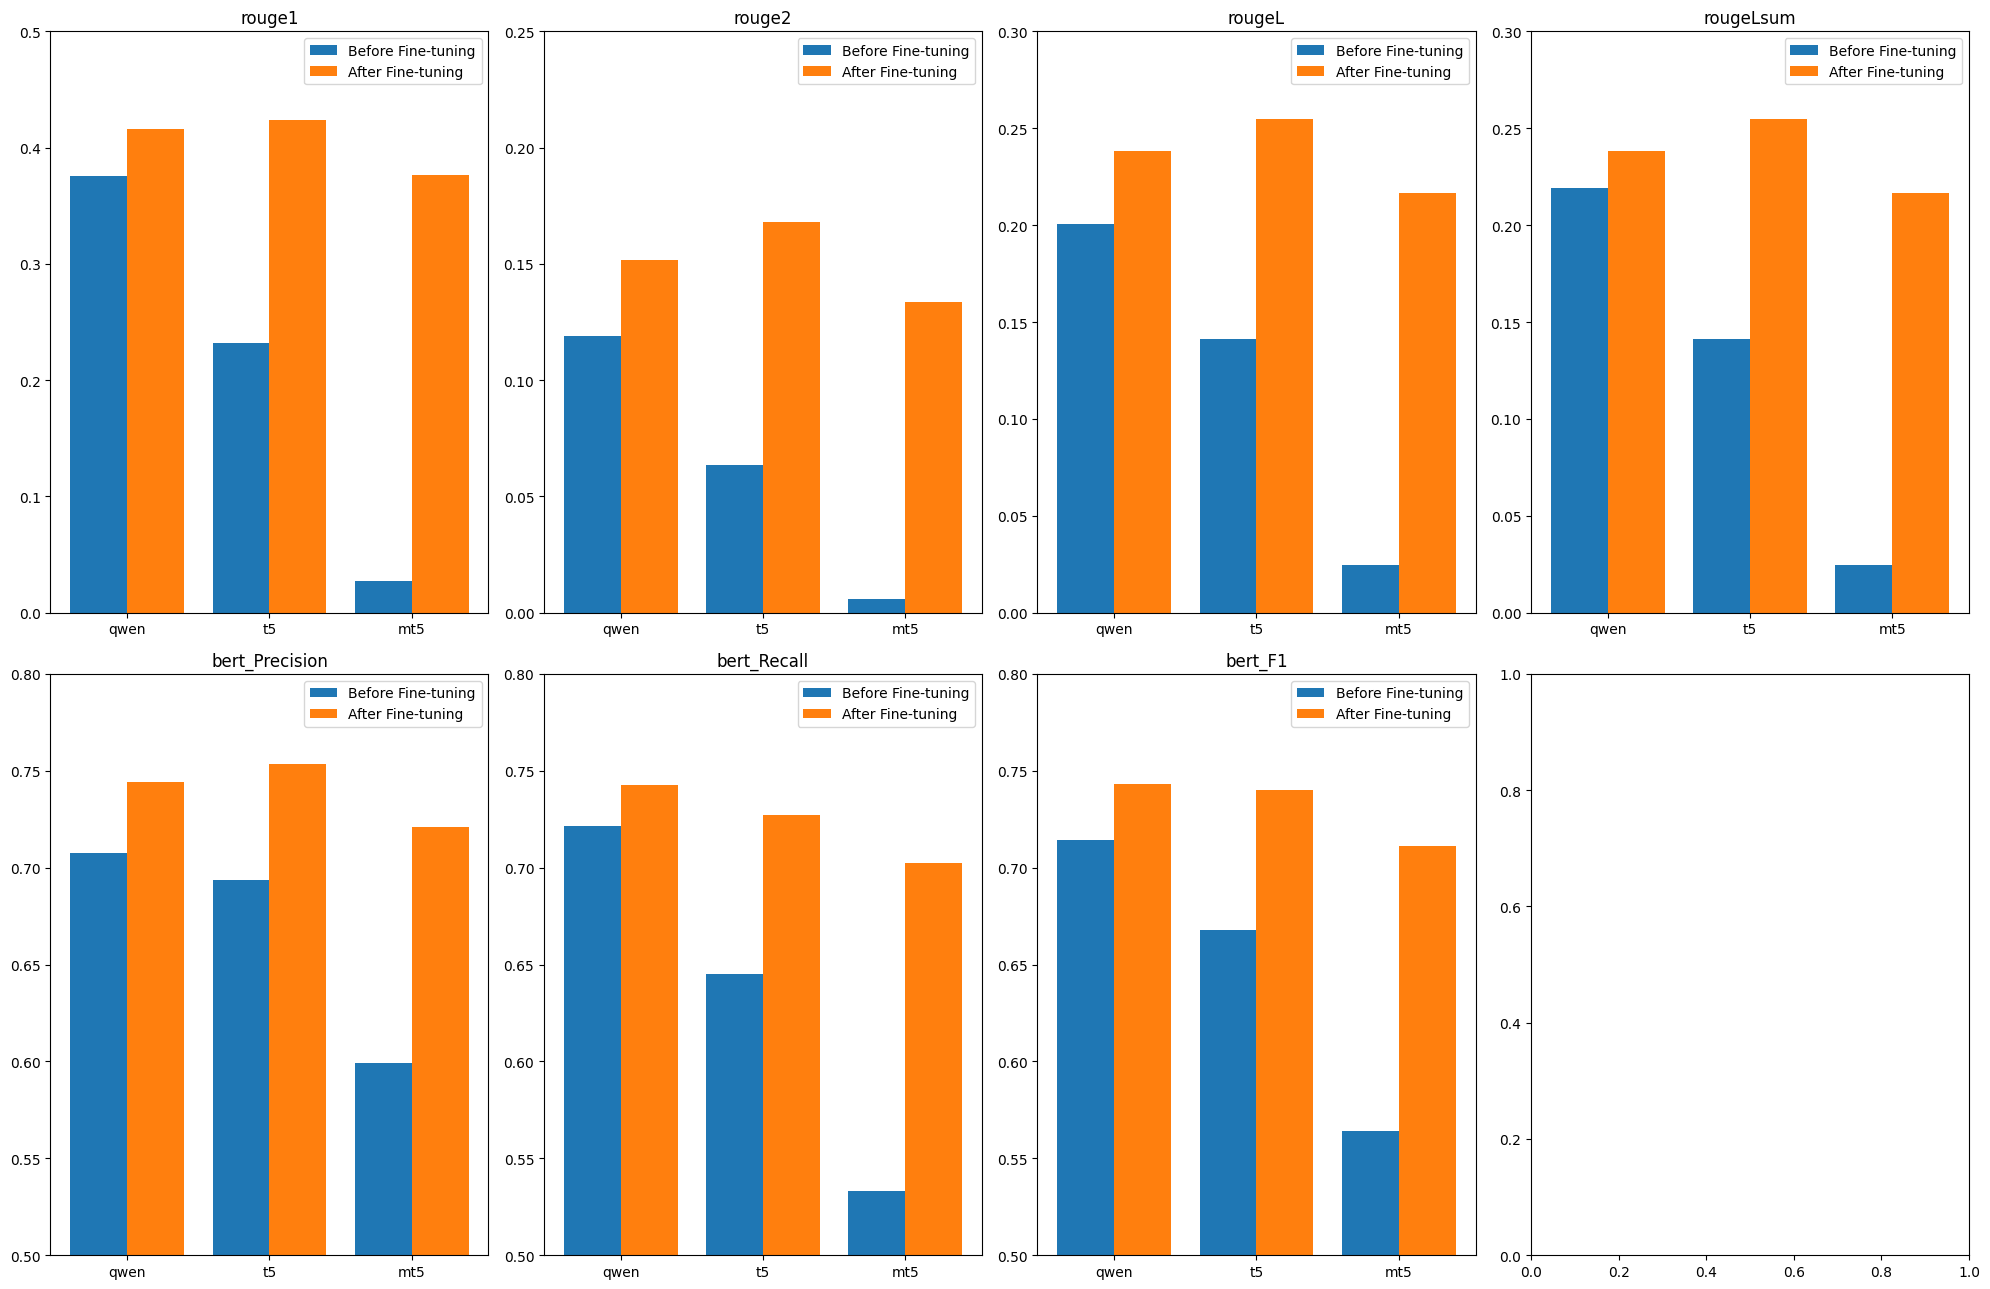

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data for 3 models, each having scores before and after fine-tuning
models = ['qwen', "t5", "mt5"]



scores_before = [
    format_scores(qwen_raw),
    format_scores(t5_raw),
    format_scores(mt5_raw)
]
scores_after = [
    format_scores(qwen_fintuned),
    format_scores(t5_finetuned),
    format_scores(mt5_finetuned)
]

# Extracting score names
score_names = list(scores_before[0].keys())

# Setting up the figure
fig, axes = plt.subplots(2, 4, figsize=(20, 13), sharey=False)
coords = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2)]
axes = [axes[coord[0], coord[1]] for coord in coords]


# Colors for before and after fine-tuning
colors = ["#1f77b4", "#ff7f0e"]
lims = [(.0, .5), (0, 0.25), (.0, 0.3),(0, 0.3), (0.5, 0.8),(0.5, 0.8),(0.5, 0.8)]
for i, score in enumerate(score_names):
    
    before_values = [model[score] for model in scores_before]
    after_values = [model[score] for model in scores_after]
    
    
    x = np.arange(len(models))
    
    ax = axes[i]
    ax.bar(x - 0.2, before_values, width=0.4, label="Before Fine-tuning", color=colors[0])
    ax.bar(x + 0.2, after_values, width=0.4, label="After Fine-tuning", color=colors[1])
    
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(lims[i][0], lims[i][1])  
    ax.legend()

plt.tight_layout()
plt.show()
